# Experiment 2 - Data quality measurement using Association Rule Mining approach - Macy's dataset

**Outline:**

1. [Import common libraries](#Import-common-libraries)
1. [Basic data exploration](#Basic-data-exploration)
1. [Data preparation using NLP](#Data-preparation-using-NLP)
1. [Prepare data for Apriori algorithm](#Prepare-data-for-apriori-algorithm)
1. [Apriori algorithm and results](#Apriori-algorithm-and-results)
1. [Create association rules](#Create-association-rules)
1. [Display results](#Display-results)

Details of the experiment can be found in the Master's thesis in sections:
* 3.3.2 Experiment 2 – Association Rule Mining,
* 3.3.2.1 Association Rule Mining experiment and results.

## Import common libraries

In [1]:
import pandas as pd
import numpy as np
import os

import math
from scipy import stats, optimize

from sklearn import metrics, preprocessing, feature_selection

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
import nltk

In [3]:
nltk.download(["brown","webtext", "words", "stopwords"] )
nltk.download(["punkt", "averaged_perceptron_tagger", "maxent_ne_chunker", "vader_lexicon", "wordnet", "tagsets"])

[nltk_data] Downloading package brown to /home/mmikus/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package webtext to /home/mmikus/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package words to /home/mmikus/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mmikus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mmikus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mmikus/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/mmikus/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package vader_lexicon

True

In [4]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [5]:
from collections import Counter
import string

## Basic data exploration

In [6]:
data = pd.read_csv('./../data/macys-dataset.csv')

In [7]:
data.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Black
1,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Simple Grid
2,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",White
3,CK Black Collection Embrace Lace-Waist Thong Q...,$26.00,$26.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Exquisitely designed embroidered lace beautifu...,NaN,NaN,"[""Elastic lace waistband"", ""Lace at front and ...","[""M""]","[""M""]",Regal Sensous
4,Halo Lace Boyshort 870205,$15.00,$15.00,http://www1.macys.com/shop/product/wacoal-halo...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,A fit that is heavenly. The stretch lace Halo ...,5.0,2.0,"[""Stretch lace waistband"", ""All-over floral la...","[""S"", ""M"", ""L"", ""XL""]","[""S"", ""M"", ""L"", ""XL""]",Black


In [8]:
display(data.shape)
display(data.describe())
data.info()

(40897, 14)

,rating,review_count
count,26092.000000,26101.000000
mean,4.447934,31.035094
std,0.607859,60.745419
min,0.000000,1.000000
25%,4.200000,2.000000
50%,4.600000,7.000000
75%,4.900000,25.000000
max,5.000000,406.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40897 entries, 0 to 40896
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      40897 non-null  object 
 1   mrp               40897 non-null  object 
 2   price             40897 non-null  object 
 3   pdp_url           40897 non-null  object 
 4   brand_name        40897 non-null  object 
 5   product_category  40897 non-null  object 
 6   retailer          40897 non-null  object 
 7   description       40897 non-null  object 
 8   rating            26092 non-null  float64
 9   review_count      26101 non-null  float64
 10  style_attributes  40897 non-null  object 
 11  total_sizes       40897 non-null  object 
 12  available_size    40897 non-null  object 
 13  color             40897 non-null  object 
dtypes: float64(2), object(12)
memory usage: 4.4+ MB


In [9]:
data.dtypes

product_name         object
mrp                  object
price                object
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count        float64
style_attributes     object
total_sizes          object
available_size       object
color                object
dtype: object

In [10]:
len(data)

40897

In [11]:
# data.nunique().plot(kind = 'barh')
data.nunique()

product_name         586
mrp                   78
price                172
pdp_url             1241
brand_name             8
product_category       6
retailer               1
description          588
rating                25
review_count         113
style_attributes     854
total_sizes          463
available_size       612
color                490
dtype: int64

## Data preparation using NLP

In [12]:
selected_column = "total_sizes"

In [13]:
column_values_list = data[selected_column].values.tolist()

In [14]:
column_corpus = ' '.join(column_values_list)

In [15]:
column_corpus[0:100]

'["XS", "S", "M", "L", "XL"] ["XS", "S", "M", "L", "XL"] ["XS", "S", "M", "L", "XL"] ["M"] ["S", "M",'

### Show Wordcloud

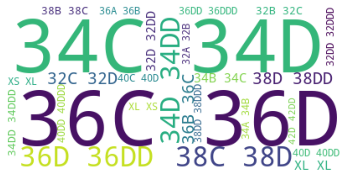

In [16]:
%matplotlib inline
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color ='white', min_font_size = 10).generate(column_corpus)

wordcloud.to_file(f'./images/assocrules/experiment-2-apriori-macys-total-sizes-wordcloud.pdf')

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Use NLTK to prepare data for Apriori algorithm

In [17]:
def getTokenCount(tokens):
    counts = Counter(tokens)
    return sorted(counts.items(), key=lambda count: count[1], reverse=True)

In [18]:
# top lemmas
def getLemmasFromTokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

In [19]:
stemmer = PorterStemmer()

Get five major products sizes via NLP.

In [20]:
stop_words = set(nltk.corpus.stopwords.words('english'))
data_count = len(data)
i = 1
for column_name in [selected_column]:
    print(f"Progress[{column_name}]")
    column_values_list = data[column_name].values.tolist()
    column_corpus = ' '.join(column_values_list)
    tokens = nltk.word_tokenize(column_corpus)
    filtered_tokens = [token for token in tokens if token not in string.punctuation]
    filtered_tokens = [token.strip(string.punctuation) for token in filtered_tokens]
    filtered_tokens = [token for token in filtered_tokens if token.lower() not in stop_words]
    filtered_tokens = [token for token in filtered_tokens if token.isspace() == False]
    filtered_tokens = [token for token in filtered_tokens if token != '']
    token_counts = getTokenCount(getLemmasFromTokens(filtered_tokens))[:5]
    for token_count in token_counts:
        if data_count == token_count[1]:
            continue
        stem = stemmer.stem(token_count[0])
        print(f"'{stem}' - '{str(token_count[1])}'")
        data[f"{column_name}_contains_{stem}"] = data[column_name].str.contains(stem, case=False)
    i = i + 1

Progress[total_sizes]
'L' - '20426'
'XL' - '13219'
'36c' - '10734'
'36d' - '10168'
'34c' - '9742'


In [21]:
data.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,total_sizes_contains_L,total_sizes_contains_XL,total_sizes_contains_36c,total_sizes_contains_36d,total_sizes_contains_34c
0,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Black,True,True,False,False,False
1,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Simple Grid,True,True,False,False,False
2,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",White,True,True,False,False,False
3,CK Black Collection Embrace Lace-Waist Thong Q...,$26.00,$26.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Exquisitely designed embroidered lace beautifu...,NaN,NaN,"[""Elastic lace waistband"", ""Lace at front and ...","[""M""]","[""M""]",Regal Sensous,False,False,False,False,False
4,Halo Lace Boyshort 870205,$15.00,$15.00,http://www1.macys.com/shop/product/wacoal-halo...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,A fit that is heavenly. The stretch lace Halo ...,5.0,2.0,"[""Stretch lace waistband"", ""All-over floral la...","[""S"", ""M"", ""L"", ""XL""]","[""S"", ""M"", ""L"", ""XL""]",Black,True,True,False,False,False


In [22]:
data = data.drop(columns=[selected_column])

In [23]:
# Select data subset
criteria = data.columns.str.contains("total_sizes")
criteria_columns = data.columns[criteria].tolist()
print(criteria_columns)

['total_sizes_contains_L', 'total_sizes_contains_XL', 'total_sizes_contains_36c', 'total_sizes_contains_36d', 'total_sizes_contains_34c']


In [24]:
data = data[criteria_columns]

In [25]:
data.head()

,total_sizes_contains_L,total_sizes_contains_XL,total_sizes_contains_36c,total_sizes_contains_36d,total_sizes_contains_34c
0,True,True,False,False,False
1,True,True,False,False,False
2,True,True,False,False,False
3,False,False,False,False,False
4,True,True,False,False,False


In [26]:
len(data)

40897

The experiment dataset was subsequently reduced to records containing at least two major product sizes values per record.

In [27]:
data = data[data[criteria_columns].sum(axis=1) >= 2]

In [28]:
len(data)

23964

In [29]:
data.head()

,total_sizes_contains_L,total_sizes_contains_XL,total_sizes_contains_36c,total_sizes_contains_36d,total_sizes_contains_34c
0,True,True,False,False,False
1,True,True,False,False,False
2,True,True,False,False,False
4,True,True,False,False,False
6,False,False,True,True,True


In [30]:
data[criteria_columns] = data[criteria_columns].astype(int)

In [31]:
data.head()

,total_sizes_contains_L,total_sizes_contains_XL,total_sizes_contains_36c,total_sizes_contains_36d,total_sizes_contains_34c
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
4,1,1,0,0,0
6,0,0,1,1,1


## Prepare data for Apriori algorithm

In [32]:
import sys
def load_data(df):
    data = []
    len_df = len(df)
    i = 1
    for index, row in df.iterrows():
        proggress_out = f"Progress: {len_df}/{i}"
        sys.stdout.write('\r'+str(proggress_out))
        list_row = []
        for col in df.columns:
            col_val = str(row[col])
            if "nan" not in col_val:            
                item = "{}:{}".format(col, col_val)
                list_row.append(item)
        data.append(list_row)
        i = i + 1

    return data

In [33]:
apr_data = load_data(data)

Progress: 23964/23964

In [34]:
print(apr_data[0])

['total_sizes_contains_L:1', 'total_sizes_contains_XL:1', 'total_sizes_contains_36c:0', 'total_sizes_contains_36d:0', 'total_sizes_contains_34c:0']


## Apriori algorithm and results

In [35]:
def frequent_items_in_trans(transactions, support):
    counter = Counter()
    for transaction in transactions:
        counter.update(frozenset([sub_tran]) for sub_tran in transaction)
    return set(item for item in counter if counter[item]/len(transactions) >= support), counter

In [36]:
def generat_candidates(cands, k):
    candidates = set()
    for a in cands:
        for b in cands:
            union = a | b
            if len(union) == k and a != b:
                candidates.add(union)
    return candidates

In [37]:
def filter_candidates(transactions, itemsets, support):
    counter = Counter()
    for transaction in transactions:
        subsets = [itemset for itemset in itemsets if itemset.issubset(transaction)]
        counter.update(subsets)
    return set(item for item in counter if counter[item]/len(transactions) >= support), counter

In [38]:
def apriori(transactions, support):
    result = []
    result_cnt = Counter()
    supported_candidates, counter = frequent_items_in_trans(transactions, support)
    result += supported_candidates
    result_cnt += counter
    k = 2
    while supported_candidates:
        print("------------------------")
        print(f"[K:{k}] Generate candidates")
        supported_candidates = generat_candidates(supported_candidates, k)
        print("#candidates: {}".format(len(supported_candidates)))
        print(f"Filter candidates via support: {support}")
        supported_candidates,counter = filter_candidates(transactions, supported_candidates, support)
        print("[K:{}] #candidates: {}".format(k, len(supported_candidates)))
        result += supported_candidates
        print("[K:{}] # resutls: {}".format(k, len(result)))
        result_cnt += counter
        k += 1
        print("------------------------")
    # Calculate support
    result_cnt = {item:(result_cnt[item]/len(transactions)) for item in result_cnt}
    
    print("------------------------")
    print("# candidates: {}, Support: {}".format(len(result), support))
    print("------------------------")
    return result, result_cnt

In [39]:
support_min_values = []
supported_rules_len_per_sup_min = []
for sup_min_val in np.arange(0.1, 1.01, 0.01):
    support_min_values.append(sup_min_val)
    supported_rules, rules_supports = apriori(apr_data, sup_min_val)
    supported_rules_len_per_sup_min.append(len(supported_rules))

------------------------
[K:2] Generate candidates
#candidates: 45
Filter candidates via support: 0.1
[K:2] #candidates: 20
[K:2] # resutls: 30
------------------------
------------------------
[K:3] Generate candidates
#candidates: 20
Filter candidates via support: 0.1
[K:3] #candidates: 20
[K:3] # resutls: 50
------------------------
------------------------
[K:4] Generate candidates
#candidates: 10
Filter candidates via support: 0.1
[K:4] #candidates: 10
[K:4] # resutls: 60
------------------------
------------------------
[K:5] Generate candidates
#candidates: 2
Filter candidates via support: 0.1
[K:5] #candidates: 2
[K:5] # resutls: 62
------------------------
------------------------
[K:6] Generate candidates
#candidates: 0
Filter candidates via support: 0.1
[K:6] #candidates: 0
[K:6] # resutls: 62
------------------------
------------------------
# candidates: 62, Support: 0.1
------------------------
------------------------
[K:2] Generate candidates
#candidates: 45
Filter cand

### Number of frequent itemsets per the minimal support

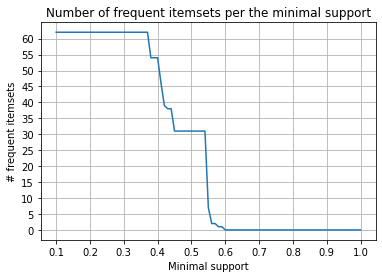

In [94]:
plt.plot(support_min_values, supported_rules_len_per_sup_min)
plt.title("Number of frequent itemsets per the minimal support")
plt.xlabel("Minimal support")
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.ylabel("# frequent itemsets")
plt.yticks(np.arange(0, max(supported_rules_len_per_sup_min)+1, 5))
plt.grid()
plt.savefig(f'./images/assocrules/experiment-2-apriori-macys-dev-per-min-sup.pdf', bbox_inches='tight')

### Use Apriori algorithm with minimal support 0.55

In [41]:
freq_sets, supports = apriori(apr_data, 0.55)

------------------------
[K:2] Generate candidates
#candidates: 10
Filter candidates via support: 0.55
[K:2] #candidates: 2
[K:2] # resutls: 7
------------------------
------------------------
[K:3] Generate candidates
#candidates: 1
Filter candidates via support: 0.55
[K:3] #candidates: 0
[K:3] # resutls: 7
------------------------
------------------------
# candidates: 7, Support: 0.55
------------------------


In [42]:
print(len(freq_sets))

7


In [43]:
print(*freq_sets, sep = "\n")

frozenset({'total_sizes_contains_34c:0'})
frozenset({'total_sizes_contains_36c:0'})
frozenset({'total_sizes_contains_36d:0'})
frozenset({'total_sizes_contains_XL:1'})
frozenset({'total_sizes_contains_L:1'})
frozenset({'total_sizes_contains_L:1', 'total_sizes_contains_XL:1'})
frozenset({'total_sizes_contains_36d:0', 'total_sizes_contains_L:1'})


In [44]:
print(len(supports))

21


In [45]:
print(*supports, sep = "\n")

frozenset({'total_sizes_contains_L:1'})
frozenset({'total_sizes_contains_XL:1'})
frozenset({'total_sizes_contains_36c:0'})
frozenset({'total_sizes_contains_36d:0'})
frozenset({'total_sizes_contains_34c:0'})
frozenset({'total_sizes_contains_L:0'})
frozenset({'total_sizes_contains_XL:0'})
frozenset({'total_sizes_contains_36c:1'})
frozenset({'total_sizes_contains_36d:1'})
frozenset({'total_sizes_contains_34c:1'})
frozenset({'total_sizes_contains_34c:0', 'total_sizes_contains_L:1'})
frozenset({'total_sizes_contains_36c:0', 'total_sizes_contains_XL:1'})
frozenset({'total_sizes_contains_34c:0', 'total_sizes_contains_36d:0'})
frozenset({'total_sizes_contains_34c:0', 'total_sizes_contains_XL:1'})
frozenset({'total_sizes_contains_36c:0', 'total_sizes_contains_36d:0'})
frozenset({'total_sizes_contains_34c:0', 'total_sizes_contains_36c:0'})
frozenset({'total_sizes_contains_L:1', 'total_sizes_contains_XL:1'})
frozenset({'total_sizes_contains_36d:0', 'total_sizes_contains_L:1'})
frozenset({'total_s

In [46]:
supported_rules_with_support = {}
for key, value in sorted(supports.items(), key=lambda item: item[1], reverse=True):
    if value >= 0.1:
        supported_rules_with_support[str(list(key))] = value
        print(f"{list(key)} with Support {value}")
res_len = len(supported_rules_with_support)
print(f"\n# final results: {res_len}")

['total_sizes_contains_34c:0'] with Support 0.594099482557169
['total_sizes_contains_36d:0'] with Support 0.5793690535803706
['total_sizes_contains_36c:0'] with Support 0.5523702219996661
['total_sizes_contains_L:1'] with Support 0.5517025538307461
['total_sizes_contains_XL:1'] with Support 0.5509096978801535
['total_sizes_contains_L:1', 'total_sizes_contains_XL:1'] with Support 0.5509096978801535
['total_sizes_contains_36d:0', 'total_sizes_contains_L:1'] with Support 0.550116841929561
['total_sizes_contains_34c:0', 'total_sizes_contains_L:1'] with Support 0.549949924887331
['total_sizes_contains_36c:0', 'total_sizes_contains_XL:1'] with Support 0.549949924887331
['total_sizes_contains_34c:0', 'total_sizes_contains_36d:0'] with Support 0.549949924887331
['total_sizes_contains_34c:0', 'total_sizes_contains_XL:1'] with Support 0.549949924887331
['total_sizes_contains_36c:0', 'total_sizes_contains_36d:0'] with Support 0.549949924887331
['total_sizes_contains_34c:0', 'total_sizes_contains_

In [47]:
for key, value in supported_rules_with_support.items(): 
    print(key, "=", value) 

['total_sizes_contains_34c:0'] = 0.594099482557169
['total_sizes_contains_36d:0'] = 0.5793690535803706
['total_sizes_contains_36c:0'] = 0.5523702219996661
['total_sizes_contains_L:1'] = 0.5517025538307461
['total_sizes_contains_XL:1'] = 0.5509096978801535
['total_sizes_contains_L:1', 'total_sizes_contains_XL:1'] = 0.5509096978801535
['total_sizes_contains_36d:0', 'total_sizes_contains_L:1'] = 0.550116841929561
['total_sizes_contains_34c:0', 'total_sizes_contains_L:1'] = 0.549949924887331
['total_sizes_contains_36c:0', 'total_sizes_contains_XL:1'] = 0.549949924887331
['total_sizes_contains_34c:0', 'total_sizes_contains_36d:0'] = 0.549949924887331
['total_sizes_contains_34c:0', 'total_sizes_contains_XL:1'] = 0.549949924887331
['total_sizes_contains_36c:0', 'total_sizes_contains_36d:0'] = 0.549949924887331
['total_sizes_contains_34c:0', 'total_sizes_contains_36c:0'] = 0.549949924887331
['total_sizes_contains_36c:0', 'total_sizes_contains_L:1'] = 0.549949924887331
['total_sizes_contains_36

## Create association rules

In [48]:
def create_rule_sides_sets(setvalues: frozenset):
    valuelist = list(setvalues)
    res = []
    for r_side in valuelist:
        l_side = list(valuelist)
        l_side.remove(r_side)
        res.append((l_side, r_side))
    return res

In [49]:
i = 0
for supported_rule in freq_sets:
    
    if len(supported_rule) <= 1:
        continue
    
    print("-------------")
    print(f"Supported rule: '{supported_rule}'")
    
    sides_sets = create_rule_sides_sets(supported_rule)
  
    i = 1
    for sides_set in sides_sets:
        print(f"\n\t----- [{i}] ------")
        print(f"Left side: {sides_set[0]}\nRight side: {sides_set[1]}")
        i += 1
    
    print("-------------")
#     if i == 100:
#         break
    i+=1

-------------
Supported rule: 'frozenset({'total_sizes_contains_L:1', 'total_sizes_contains_XL:1'})'

	----- [1] ------
Left side: ['total_sizes_contains_XL:1']
Right side: total_sizes_contains_L:1

	----- [2] ------
Left side: ['total_sizes_contains_L:1']
Right side: total_sizes_contains_XL:1
-------------
-------------
Supported rule: 'frozenset({'total_sizes_contains_36d:0', 'total_sizes_contains_L:1'})'

	----- [1] ------
Left side: ['total_sizes_contains_L:1']
Right side: total_sizes_contains_36d:0

	----- [2] ------
Left side: ['total_sizes_contains_36d:0']
Right side: total_sizes_contains_L:1
-------------


In [50]:
def create_rules(freq_sets, supports, metric_threshold, metric="confidence"):
    final_rules = []

    for itemset in freq_sets:
        
        if len(itemset) <= 1:
            continue

        for entry in create_rule_sides_sets(itemset):
            l_side, r_side = entry
            if metric == "confidence":
                # conf = Supp(L and R) / Supp (L) -- itemset = L and R
                metric_value = supports[itemset] / supports[frozenset(l_side)]
            elif metric == "conviction":
                # 1 - conf
                denom = 1-supports[itemset] / supports[frozenset(l_side)]
                if denom:
                    metric_value = (1-supports[frozenset([r_side])]) / (denom)
                else:
                    metric_value = 0
            elif metric == "lift":
                metric_value = supports[itemset] / (supports[frozenset(l_side)] * supports[frozenset([r_side])])
                    
            if metric_value >= metric_threshold:
                final_rules.append((l_side, r_side, metric_value, list(itemset)))

    # Sort
    final_rules = sorted(final_rules, key=lambda rule: rule[2], reverse=True)
    print(f"# rules: {len(final_rules)}")
    print(*final_rules, sep='\n')
    return final_rules

In [51]:
results = create_rules(freq_sets, supports, 0.00, metric="confidence")

# rules: 4
(['total_sizes_contains_XL:1'], 'total_sizes_contains_L:1', 1.0, ['total_sizes_contains_L:1', 'total_sizes_contains_XL:1'])
(['total_sizes_contains_L:1'], 'total_sizes_contains_XL:1', 0.9985628923682022, ['total_sizes_contains_L:1', 'total_sizes_contains_XL:1'])
(['total_sizes_contains_L:1'], 'total_sizes_contains_36d:0', 0.9971257847364043, ['total_sizes_contains_36d:0', 'total_sizes_contains_L:1'])
(['total_sizes_contains_36d:0'], 'total_sizes_contains_L:1', 0.9495102276001152, ['total_sizes_contains_36d:0', 'total_sizes_contains_L:1'])


In [52]:
data_results = pd.DataFrame(columns=['rule','support', 'confidence', 'lift', 'conviction'])
support_res = []
rule_res = []
for result in results:
    rule = f"{str(result[0])} => {str(result[1])}"
    rule_res.append(rule)
    support_res.append(supported_rules_with_support[str(result[3])])
data_results['rule'] = rule_res
data_results['support'] = support_res

In [53]:
data_results = data_results.set_index('rule')

In [54]:
print(support_res)

[0.5509096978801535, 0.5509096978801535, 0.550116841929561, 0.550116841929561]


In [55]:
data_results[0:30]

,support,confidence,lift,conviction
rule,,,,
['total_sizes_contains_XL:1'] => total_sizes_contains_L:1,0.550910,NaN,NaN,NaN
['total_sizes_contains_L:1'] => total_sizes_contains_XL:1,0.550910,NaN,NaN,NaN
['total_sizes_contains_L:1'] => total_sizes_contains_36d:0,0.550117,NaN,NaN,NaN
['total_sizes_contains_36d:0'] => total_sizes_contains_L:1,0.550117,NaN,NaN,NaN


In [56]:
for result in results:
    print(str(result[3]))
    rule = f"{str(result[0])} => {str(result[1])}"
    print(rule)
    print(f"Support: {supported_rules_with_support[str(result[3])]}")
    support_res.append(supported_rules_with_support[str(result[3])])
    print(f"Confidence: {result[2]}")
    data_results.loc[rule, "confidence"] = result[2]

['total_sizes_contains_L:1', 'total_sizes_contains_XL:1']
['total_sizes_contains_XL:1'] => total_sizes_contains_L:1
Support: 0.5509096978801535
Confidence: 1.0
['total_sizes_contains_L:1', 'total_sizes_contains_XL:1']
['total_sizes_contains_L:1'] => total_sizes_contains_XL:1
Support: 0.5509096978801535
Confidence: 0.9985628923682022
['total_sizes_contains_36d:0', 'total_sizes_contains_L:1']
['total_sizes_contains_L:1'] => total_sizes_contains_36d:0
Support: 0.550116841929561
Confidence: 0.9971257847364043
['total_sizes_contains_36d:0', 'total_sizes_contains_L:1']
['total_sizes_contains_36d:0'] => total_sizes_contains_L:1
Support: 0.550116841929561
Confidence: 0.9495102276001152


In [57]:
data_results.head()

,support,confidence,lift,conviction
rule,,,,
['total_sizes_contains_XL:1'] => total_sizes_contains_L:1,0.550910,1,NaN,NaN
['total_sizes_contains_L:1'] => total_sizes_contains_XL:1,0.550910,0.998563,NaN,NaN
['total_sizes_contains_L:1'] => total_sizes_contains_36d:0,0.550117,0.997126,NaN,NaN
['total_sizes_contains_36d:0'] => total_sizes_contains_L:1,0.550117,0.94951,NaN,NaN


In [58]:
results = create_rules(freq_sets, supports, 0.0, metric="lift")

# rules: 4
(['total_sizes_contains_XL:1'], 'total_sizes_contains_L:1', 1.8125709099160427, ['total_sizes_contains_L:1', 'total_sizes_contains_XL:1'])
(['total_sizes_contains_L:1'], 'total_sizes_contains_XL:1', 1.8125709099160427, ['total_sizes_contains_L:1', 'total_sizes_contains_XL:1'])
(['total_sizes_contains_L:1'], 'total_sizes_contains_36d:0', 1.7210546172157297, ['total_sizes_contains_36d:0', 'total_sizes_contains_L:1'])
(['total_sizes_contains_36d:0'], 'total_sizes_contains_L:1', 1.7210546172157297, ['total_sizes_contains_36d:0', 'total_sizes_contains_L:1'])


In [59]:
for result in results:
    print(str(result[3]))
    rule = f"{str(result[0])} => {str(result[1])}"
    print(rule)
    print(f"Support: {supported_rules_with_support[str(result[3])]}")
    support_res.append(supported_rules_with_support[str(result[3])])
    print(f"Lift: {result[2]}")
    data_results.loc[rule, "lift"] = result[2]

['total_sizes_contains_L:1', 'total_sizes_contains_XL:1']
['total_sizes_contains_XL:1'] => total_sizes_contains_L:1
Support: 0.5509096978801535
Lift: 1.8125709099160427
['total_sizes_contains_L:1', 'total_sizes_contains_XL:1']
['total_sizes_contains_L:1'] => total_sizes_contains_XL:1
Support: 0.5509096978801535
Lift: 1.8125709099160427
['total_sizes_contains_36d:0', 'total_sizes_contains_L:1']
['total_sizes_contains_L:1'] => total_sizes_contains_36d:0
Support: 0.550116841929561
Lift: 1.7210546172157297
['total_sizes_contains_36d:0', 'total_sizes_contains_L:1']
['total_sizes_contains_36d:0'] => total_sizes_contains_L:1
Support: 0.550116841929561
Lift: 1.7210546172157297


In [60]:
data_results.head()

,support,confidence,lift,conviction
rule,,,,
['total_sizes_contains_XL:1'] => total_sizes_contains_L:1,0.550910,1,1.81257,NaN
['total_sizes_contains_L:1'] => total_sizes_contains_XL:1,0.550910,0.998563,1.81257,NaN
['total_sizes_contains_L:1'] => total_sizes_contains_36d:0,0.550117,0.997126,1.72105,NaN
['total_sizes_contains_36d:0'] => total_sizes_contains_L:1,0.550117,0.94951,1.72105,NaN


In [61]:
results = create_rules(freq_sets, supports, 0.0, metric="conviction")

# rules: 4
(['total_sizes_contains_L:1'], 'total_sizes_contains_XL:1', 312.49594128035636, ['total_sizes_contains_L:1', 'total_sizes_contains_XL:1'])
(['total_sizes_contains_L:1'], 'total_sizes_contains_36d:0', 146.34636164774167, ['total_sizes_contains_36d:0', 'total_sizes_contains_L:1'])
(['total_sizes_contains_36d:0'], 'total_sizes_contains_L:1', 8.878975381760217, ['total_sizes_contains_36d:0', 'total_sizes_contains_L:1'])
(['total_sizes_contains_XL:1'], 'total_sizes_contains_L:1', 0, ['total_sizes_contains_L:1', 'total_sizes_contains_XL:1'])


In [62]:
for result in results:
    print(str(result[3]))
    rule = f"{str(result[0])} => {str(result[1])}"
    print(rule)
    print(f"Support: {supported_rules_with_support[str(result[3])]}")
    support_res.append(supported_rules_with_support[str(result[3])])
    print(f"Conviction: {result[2]}")
    data_results.loc[rule, "conviction"] = result[2]

['total_sizes_contains_L:1', 'total_sizes_contains_XL:1']
['total_sizes_contains_L:1'] => total_sizes_contains_XL:1
Support: 0.5509096978801535
Conviction: 312.49594128035636
['total_sizes_contains_36d:0', 'total_sizes_contains_L:1']
['total_sizes_contains_L:1'] => total_sizes_contains_36d:0
Support: 0.550116841929561
Conviction: 146.34636164774167
['total_sizes_contains_36d:0', 'total_sizes_contains_L:1']
['total_sizes_contains_36d:0'] => total_sizes_contains_L:1
Support: 0.550116841929561
Conviction: 8.878975381760217
['total_sizes_contains_L:1', 'total_sizes_contains_XL:1']
['total_sizes_contains_XL:1'] => total_sizes_contains_L:1
Support: 0.5509096978801535
Conviction: 0


In [63]:
data_results.head()

,support,confidence,lift,conviction
rule,,,,
['total_sizes_contains_XL:1'] => total_sizes_contains_L:1,0.550910,1,1.81257,0
['total_sizes_contains_L:1'] => total_sizes_contains_XL:1,0.550910,0.998563,1.81257,312.496
['total_sizes_contains_L:1'] => total_sizes_contains_36d:0,0.550117,0.997126,1.72105,146.346
['total_sizes_contains_36d:0'] => total_sizes_contains_L:1,0.550117,0.94951,1.72105,8.87898


Save results about the final association rules.

In [64]:
data_results.to_csv('./images/assocrules/experiment-2-apriori-macys-rules-metrics.csv')

In [65]:
data_results.to_latex('./latex/assocrules/experiment-2-apriori-macys-rules-metrics.tex')

## Display results

In [66]:
plt_rules = data_results.index.values.tolist()
print(plt_rules)

["['total_sizes_contains_XL:1'] => total_sizes_contains_L:1", "['total_sizes_contains_L:1'] => total_sizes_contains_XL:1", "['total_sizes_contains_L:1'] => total_sizes_contains_36d:0", "['total_sizes_contains_36d:0'] => total_sizes_contains_L:1"]


In [67]:
plt_supp = data_results["support"].tolist()
print(plt_supp)

[0.5509096978801535, 0.5509096978801535, 0.550116841929561, 0.550116841929561]


In [68]:
plt_conf = data_results["confidence"].tolist()
print(plt_conf)

[1.0, 0.9985628923682022, 0.9971257847364043, 0.9495102276001152]


In [69]:
plt_lift = data_results["lift"].tolist()
print(plt_lift)

[1.8125709099160427, 1.8125709099160427, 1.7210546172157297, 1.7210546172157297]


In [70]:
print(min(plt_lift))
print(max(plt_lift))

1.7210546172157297
1.8125709099160427


In [71]:
plt_conv = data_results["conviction"].tolist()
print(plt_conv)

[0, 312.49594128035636, 146.34636164774167, 8.878975381760217]


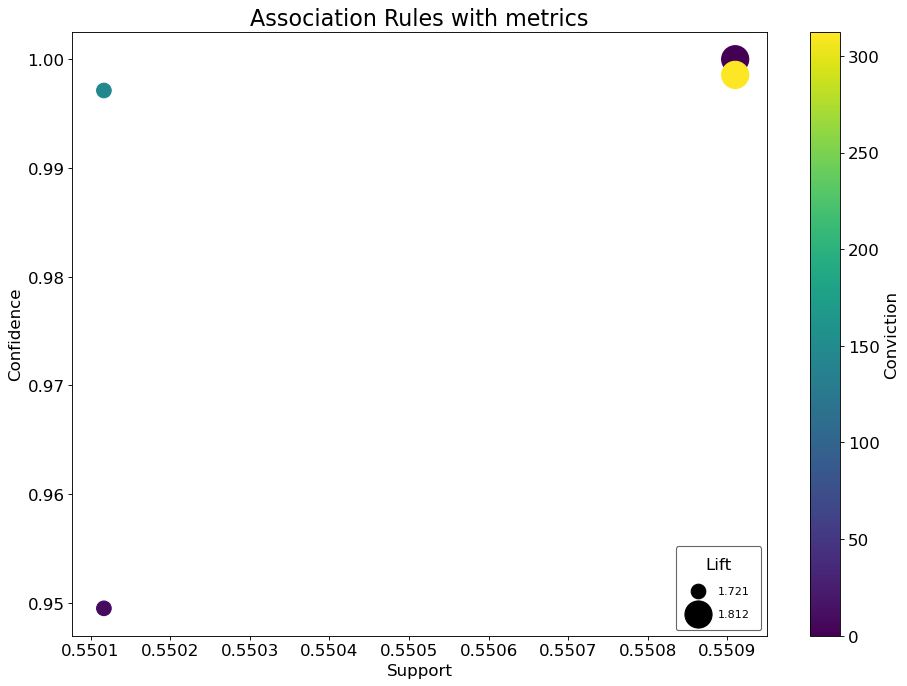

In [114]:
# plot results
plt.figure(figsize=(14, 10), dpi=80)

new_plt_lift = []
resc = [3, 3, 1, 1]
i = 0
for val in plt_lift:
    #print(val)
    #print((val**resc[i])*100)
    new_plt_lift.append((val**resc[i])*100)
    i = i + 1
    
#new_plt_lift = [(i**8)*10 for i in plt_lift]
plt.scatter(plt_supp, plt_conf, c = plt_conv, s=new_plt_lift, cmap="viridis")
ax = plt.gca()

#for i, txt in enumerate(plt_rules):
#    ax.annotate(txt, ((plt_supp[i]), (plt_conf[i])), horizontalalignment='left', verticalalignment='bottom')

plt.title("Association Rules with metrics", fontsize=20)
cbar = plt.colorbar(label="Conviction")
cbar.set_label(label="Conviction", size=15)
cbar.ax.tick_params(labelsize=15)
ax.tick_params(labelsize=15) 
plt.xlabel("Support", fontsize=15)
plt.ylabel("Confidence", fontsize=15)

# Legend:
pws = [0, 1.721, 1.812]
resc = [0, 1, 3]
i = 0
for pw in pws:
    plt.scatter([], [], s=(pw**resc[i])*100, c="k",label=str(pw))
    i = i + 1

h, l = plt.gca().get_legend_handles_labels()
lg = plt.legend(h[1:], l[1:], labelspacing=1.2, title="Lift", borderpad=1, 
            frameon=True, framealpha=0.6, edgecolor="k", facecolor="w")
lg.get_title().set_fontsize(15)

plt.savefig(f'./images/assocrules/experiment-2-apriori-macys-rules-metrics.pdf', bbox_inches='tight')
#plt.show()